In [19]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('train.csv', engine='python')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


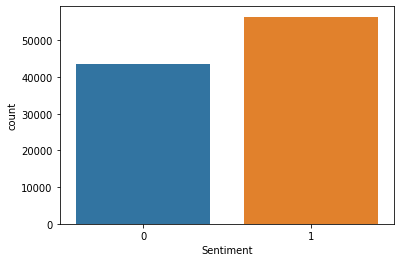

In [24]:
import seaborn as sns
ax = sns.countplot(df.Sentiment)

In [25]:
df['SentimentText'] = df.SentimentText.str.replace('@', '')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [26]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

df['SentimentText'] = df['SentimentText'].str.replace("[^a-zA-Z#]", " ")
df['SentimentText'] = df['SentimentText'].str.replace("#", "")
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already O
3,4,0,Omgaga Im sooo im gunna CRy I ...
4,5,0,i think mi bf is cheating on me ...


In [27]:
# Most Common Words in Training Dataset
from collections import Counter 
all_words = []
for line in list(df['SentimentText']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a = Counter(all_words).most_common(10)
a

[('i', 63545),
 ('you', 30129),
 ('the', 30058),
 ('to', 29630),
 ('a', 22825),
 ('it', 22344),
 ('and', 16479),
 ('my', 13882),
 ('that', 13727),
 ('s', 12766)]

In [28]:
df['SentimentText'] = df['SentimentText'].apply(lambda x: x.split())
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,"[is, so, sad, for, my, APL, friend]"
1,2,0,"[I, missed, the, New, Moon, trailer]"
2,3,1,"[omg, its, already, O]"
3,4,0,"[Omgaga, Im, sooo, im, gunna, CRy, I, ve, been..."
4,5,0,"[i, think, mi, bf, is, cheating, on, me, T, T]"


In [29]:
# Stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df['SentimentText']= df['SentimentText'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,"[is, so, sad, for, my, apl, friend]"
1,2,0,"[i, miss, the, new, moon, trailer]"
2,3,1,"[omg, it, alreadi, o]"
3,4,0,"[omgaga, im, sooo, im, gunna, cri, i, ve, been..."
4,5,0,"[i, think, mi, bf, is, cheat, on, me, t, t]"


In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

In [33]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [34]:
df['SentimentText'] = df['SentimentText'].apply(process) 
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,"[apl, sad, friend]"
1,2,0,"[moon, new, trailer, miss]"
2,3,1,"[omg, alreadi]"
3,4,0,"[supos, sinc, gunna, cri, dentist, crown, put,..."
4,5,0,"[cheat, mi, bf, think]"


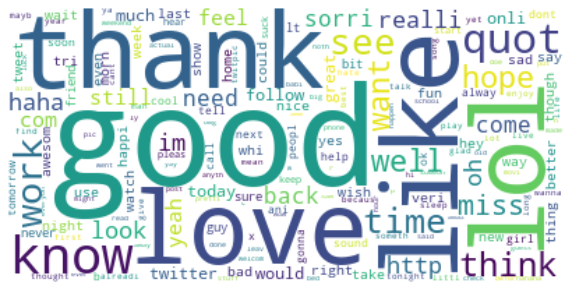

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in df['SentimentText']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
df['SentimentText'] = df['SentimentText'].apply(string)
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,apl sad friend
1,2,0,moon new trailer miss
2,3,1,omg alreadi
3,4,0,supos sinc gunna cri dentist crown put min omg...
4,5,0,cheat mi bf think


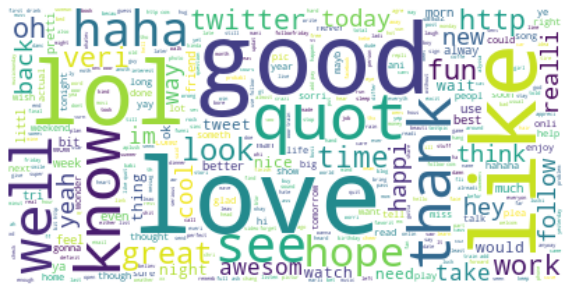

In [37]:
positive = [r for r in df['SentimentText'][df['Sentiment'] == 1]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

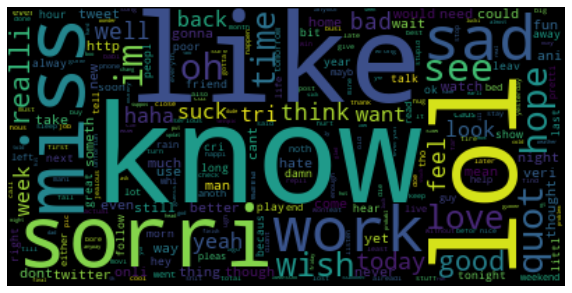

In [39]:
negative = [r for r in df['SentimentText'][df['Sentiment'] == 0]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
df.drop(["ItemID"],axis=1,inplace=True)
df.head()

,Sentiment,SentimentText
0,0,apl sad friend
1,0,moon new trailer miss
2,1,omg alreadi
3,0,supos sinc gunna cri dentist crown put min omg...
4,0,cheat mi bf think


In [43]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["SentimentText"], 
                                                    df["Sentiment"], test_size = 0.2, random_state = 42)

print("training set :", x_train.shape, y_train.shape)
print("testing set :", x_test.shape, y_test.shape)

training set : (79991,) (79991,)
testing set : (19998,) (19998,)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(79991, 73109)
(79991, 73109)


In [45]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(19998, 73109)
(19998, 73109)


In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
predictions = model.predict(x_test_tfidf)

In [48]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

72.84728472847284

In [49]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[5809, 2941],
       [2489, 8759]])

In [52]:
totalSentence = int(input('Total sentence to input: '))

sentences = []
for i in range(totalSentence):
  sentences.append(input(f'Sentence {i + 1}: '))

# tweets = pd.DataFrame(['I am so happy that I am stressed'])
tweets = pd.DataFrame(sentences)

# Text Preprocessing
tweets[0] = tweets[0].str.replace('[^\w\s]', ' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

tweet_count = count_vect.transform(tweets[0])
tweet_pred = model.predict(tweet_count)

print('\nNo | Mood  | Sentence ')
for i in range(totalSentence):
  if (tweet_pred[i] == 0):
    print(f'{i + 1}  | Negative | ', end='')
  else:
    print(f'{i + 1}  | Positive   | ', end='')
  print(sentences[i])

Total sentence to input: 5
Sentence 1: I am very happy today! The atmosphere looks cheerful
Sentence 2: Success is right around the corner. Lets celebrate this victory'
Sentence 3: His death broke my heart. It was a sad day
Sentence 4: This is quite depressing. I am filled with sorrow
Sentence 5: I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel

No | Mood  | Sentence 
1  | Positive   | I am very happy today! The atmosphere looks cheerful
2  | Positive   | Success is right around the corner. Lets celebrate this victory'
3  | Negative | His death broke my heart. It was a sad day
4  | Negative | This is quite depressing. I am filled with sorrow
5  | Negative | I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel
